In [1]:
from sentence_transformers import SentenceTransformer
import utils as utl
from ipywidgets import IntProgress
from IPython.display import display
from tqdm.notebook import tqdm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [6]:
chunks = utl.load_json("data/astro_chunks_infos.json")

In [7]:
model = SentenceTransformer('intfloat/e5-large-v2')

In [8]:
input_texts = [chunk["content"] for chunk in chunks]

In [9]:
len(input_texts)

419

In [11]:
embeddings = []
for text in tqdm(input_texts, desc="Embeddings", total=len(input_texts)):
    embedding = model.encode([text], normalize_embeddings=True)
    embeddings.append(embedding[0])

Embeddings:   0%|          | 0/419 [00:00<?, ?it/s]

In [16]:
len(embeddings)

419

In [14]:
np.save('data/astro_embeddings.npy',embeddings)

In [2]:
embeddings = np.load('data/astro_embeddings.npy')

In [ ]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

In [5]:
cluster_labels

array([6, 6, 6, 6, 6, 5, 1, 1, 1, 3, 1, 1, 5, 1, 1, 3, 7, 7, 1, 0, 3, 3,
       1, 3, 3, 5, 5, 5, 5, 5, 0, 0, 1, 1, 1, 1, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 1, 1, 6, 6, 5, 6, 5, 3, 3, 3, 3, 6, 0, 7, 6, 6, 7, 7,
       0, 3, 6, 5, 3, 6, 6, 6, 6, 5, 0, 3, 3, 3, 3, 5, 3, 3, 0, 5, 3, 0,
       1, 7, 7, 7, 7, 7, 7, 3, 7, 6, 1, 4, 4, 5, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 1, 1, 1, 1, 1, 7, 0,
       0, 0, 5, 0, 5, 0, 1, 1, 1, 1, 1, 1, 0, 5, 0, 7, 7, 5, 0, 7, 5, 0,
       5, 5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 0, 1, 1, 5, 0, 0, 0, 1, 5, 0, 1,
       1, 0, 5, 7, 7, 7, 7, 7, 7, 7, 1, 1, 6, 6, 6, 6, 1, 7, 1, 7, 1, 6,
       6, 6, 6, 6, 1, 1, 7, 1, 3, 6, 1, 1, 1, 1, 1, 6, 6, 6, 6, 3, 7, 1,
       0, 5, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 5, 0, 1, 3, 1, 7, 7, 0, 1,
       1, 1, 1, 0, 7, 7, 7, 1, 1, 0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0,
       5, 4, 5, 5, 3, 1, 5, 7, 5, 5, 7, 1, 1, 1, 5, 3, 7, 7, 7, 0, 0, 0,
       0, 1, 1, 1, 1, 7, 1, 1, 1, 2, 2, 2, 2, 2, 2,

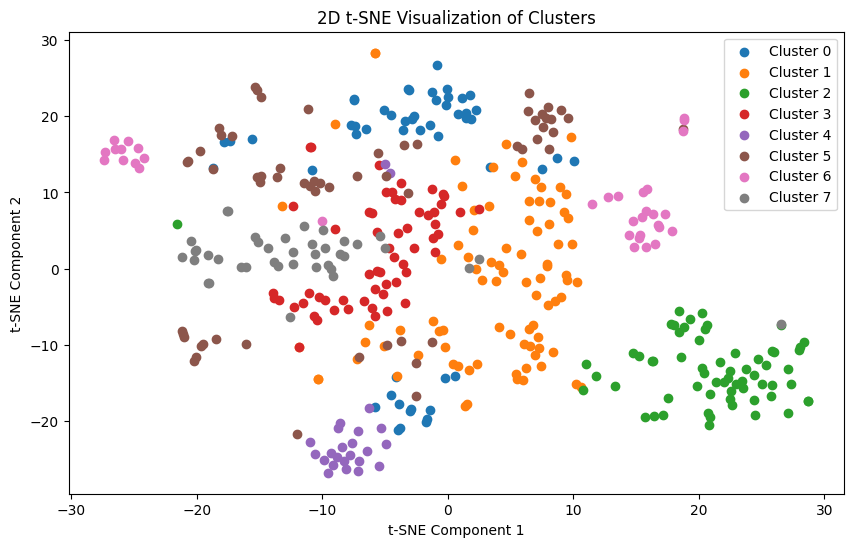

In [6]:
labels = kmeans.labels_

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(embeddings_2d[labels == i, 0], embeddings_2d[labels == i, 1], label=f'Cluster {i}')
    
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Visualization of Clusters')
plt.show()